In [178]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [201]:
class KalmanFilter:
    def __init__(self, A, C, Q, R):
        """
        Args:
            A (np.ndarray): システム行列
            C (np.ndarray): 観測行列
            Q (np.ndarray): システムモデルのノイズの分散共分散行列
            R (np.ndarray): 観測行列のノイズの分散共分散行列
        """
        self.A = A
        self.C = C
        self.Q = Q
        self.R = R
    
    def predict(self, x, y, V):
        """
        前回の推定値x, 観測値y, 前回の誤差共分散Vから推定値を求める
        Args:
            x (np.ndarray): 前回の推定値x_t-1
            y (np.ndarray): 今回の観測値y_t
            V (np.ndarray): 前回の推定誤差分散共分散行列
        """
        # 時間更新(次の時間のx, vを推定)
        x_next = self.A@x
        V_next = self.A@V@(self.A.T) + Q
        
        d = V_next.shape[0]
        # 観測更新
        K = V_next@self.C.T@np.linalg.inv(self.C@V_next@self.C.T + self.R)
        x_new = x_next + K@(y - self.C@x_next)
        V_new = (np.identity(d) - K@self.C)@V_next

        return x_new, V_new

In [202]:
# 適当なデータ生成
N = 20
_x = np.linspace(50, 120, N)
_y = (_x - 50)**2 / (-50) + 100
true_data = np.stack((_x, _y)) + np.random.normal(scale=1.0, size=(2, N))
obs_data = true_data + np.random.normal(scale=5.0, size=(2, N))

In [203]:
A = np.array([
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

C = np.identity(4)
Q = np.identity(4) * 1
R = np.identity(4) * 50

kalman = KalmanFilter(A, C, Q, R)

# 推定値の初期値, 初期速度は(0, 0)
x = obs_data.T[0]
v = np.zeros(2)
V = np.identity(4)

pred_data = [x]
pred_v = [v]

for y in obs_data.T[1:]:
    y = np.concatenate((y, y - x))
    xv = np.concatenate((x, v))
    xv, V = kalman.predict(xv, y, V)
    x = xv[:2]
    v = xv[2:]
    pred_data.append(x)
    pred_v.append(v)
pred_data = np.array(pred_data).T

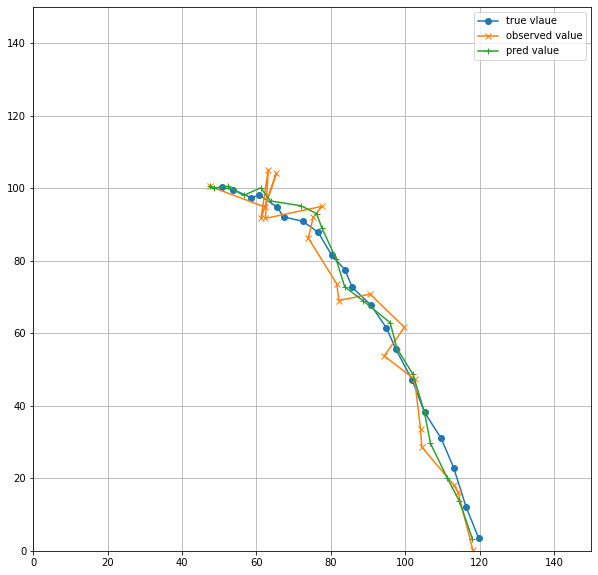

In [204]:
plt.figure(figsize=(10, 10))
plt.plot(true_data[0], true_data[1], label='true vlaue', marker='o')
plt.plot(obs_data[0], obs_data[1], label='observed value', marker='x')
plt.plot(pred_data[0], pred_data[1], label='pred value', marker='+')

plt.grid()
plt.xlim(0, 150)
plt.ylim(0, 150)
plt.legend()
plt.show()

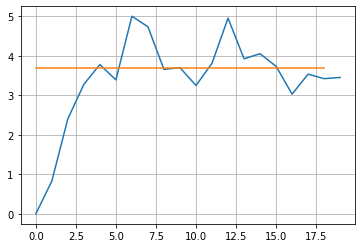

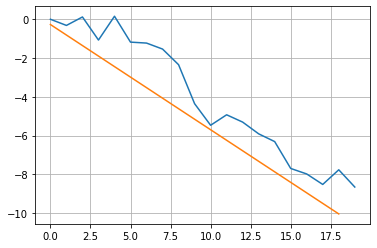

In [205]:
# 速度検証
plt.plot(np.array(pred_v)[:, 0])
plt.plot(_x[1:] - _x[:-1])
plt.grid()
plt.show()

plt.plot(np.array(pred_v)[:, 1])
plt.plot(_y[1:] - _y[:-1])
plt.grid()
plt.show()